In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv("yds_train2018.csv")
test_df=pd.read_csv("yds_test2018.csv")
expence_df=pd.read_csv("promotional_expense.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79072 entries, 0 to 79071
Data columns (total 8 columns):
S_No           79072 non-null int64
Year           79072 non-null int64
Month          79072 non-null int64
Week           79072 non-null int64
Merchant_ID    79072 non-null object
Product_ID     79072 non-null int64
Country        79072 non-null object
Sales          79072 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ MB


In [2]:
expence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 5 columns):
Year             435 non-null int64
Month            435 non-null int64
Country          435 non-null object
Product_Type     435 non-null int64
Expense_Price    435 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.1+ KB


# Merchant VS Sales

In [3]:
pivot_tab=train_df.pivot_table(index="Merchant_ID",values="Sales",aggfunc=np.sum).sort_values(by="Sales",ascending=False)
pivot_tab.head()

,Sales
Merchant_ID,
d0000295,2.280245e+09
d000077,6.772027e+08
d0000171,5.921391e+08
ar000064,4.270424e+08
d0000144,4.068329e+08


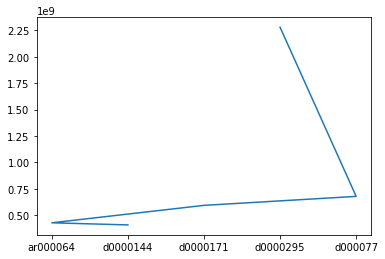

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(pivot_tab.index[0:5],pivot_tab["Sales"][0:5],label="Highest selling Merchants")

plt.show()

The above graph show the plotting of the top 5 merchants who made the most money by selling any or all of the product.

# Sales VS Year

([<matplotlib.axis.XTick at 0x10e096cf8>,
 <a list of 4 Text xticklabel objects>)

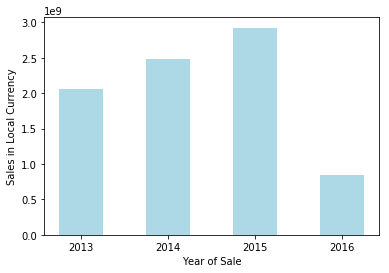

In [5]:
pivot_tab2=train_df.pivot_table(index="Year",values="Sales",aggfunc=np.sum)
plt.bar(pivot_tab2.index,pivot_tab2["Sales"],0.5,color="lightblue")
plt.xlabel("Year of Sale")
plt.ylabel("Sales in Local Currency")
plt.xticks([2013,2014,2015,2016])

The plotting of the data of the pivot table finds a fact that products (all included) were sold in maximum quantity in year 2015 than any other year. And 2016 year containing the lowest quantity of products sold by the merchants.

# Year VS Month VS Sales

In [6]:
pivot_tab=train_df.pivot_table(index=["Month","Year"],values="Sales",aggfunc=np.sum)
pivot_tab=pivot_tab.reset_index(level=[0]).reset_index().sort_values("Year")
pivot_tab.head()

,Year,Month,Sales
0,2013,1,1.618755e+08
20,2013,6,1.545478e+08
12,2013,4,1.692396e+08
24,2013,7,1.942885e+08
36,2013,10,1.937118e+08


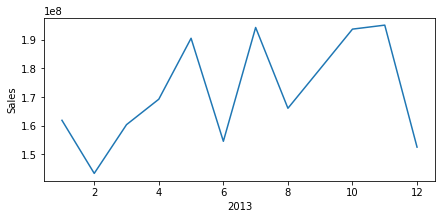

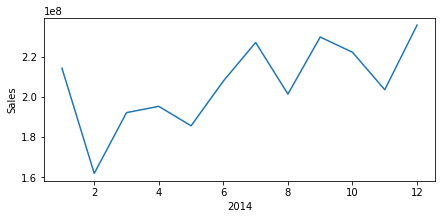

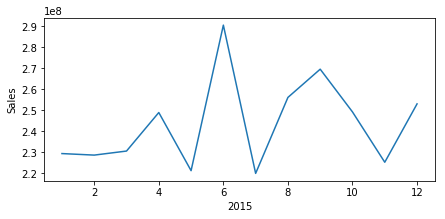

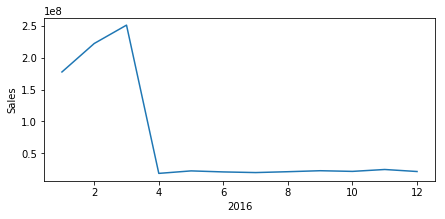

In [7]:
for i in [2013,2014,2015,2016]:
    plt.figure(figsize=(7,3))
    df=pivot_tab[pivot_tab["Year"]==i].sort_values("Month")
    plt.plot(df["Month"],df["Sales"])
    plt.xlabel(i)
    plt.ylabel("Sales")
    plt.show()

After plotting of the Sales data year wise by Sales vs Months graph for each year, pattern like increasing or decreasing Sales from beginning of the year to the end f the year can be observed. For year 2016 Sales increases from month 1 till month3 but after that there is a sharp decline in the sales till month4 after which it is pretty much stable. For year 2014 the sales overall increases.

# Sales VS Expenses

In [8]:
pivot_tab=train_df.pivot_table(index=["Country","Month","Product_ID","Year"],values="Sales",aggfunc=np.sum)
pivot_df=pivot_tab.reset_index(level=[0,1,2])
pivot_df=pivot_df.reset_index().sort_values(["Year","Product_ID","Month"]).reset_index(drop=True)
expence_df=expence_df.rename(index=str, columns={"Product_Type": "Product_ID"})
t=pd.merge(pivot_df,expence_df,how="left",on=["Year","Month","Country","Product_ID"])
t.head()


,Year,Country,Month,Product_ID,Sales,Expense_Price
0,2013,Argentina,1,1,34346025.00,14749.307
1,2013,Columbia,1,1,3947356.31,1893.122
2,2013,Argentina,2,1,32005575.00,12187.566
3,2013,Columbia,2,1,4074073.20,1977.945
4,2013,Argentina,3,1,32530050.00,13076.579


Text(0,0.5,'Expenses for promotion of the product')

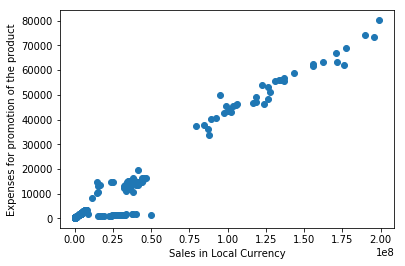

In [9]:
plt.scatter(t["Sales"],t["Expense_Price"])
plt.xlabel("Sales in Local Currency")
plt.ylabel("Expenses for promotion of the product")

The above graph show the trend that with the increase in the promotional expenses the Sales of the Products also increases. So Sale in directly proportional to expences spend on promotions.

# Product_ID VS Sales

Text(0,0.5,'Sales')

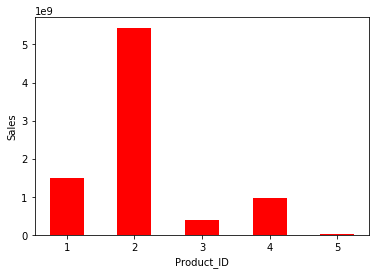

In [10]:
pivot_tab=train_df.pivot_table(index="Product_ID",values="Sales",aggfunc=np.sum)
plt.bar(pivot_tab.index,pivot_tab["Sales"],0.5,color="red")
plt.xlabel("Product_ID")
plt.ylabel("Sales")

Product with Product_ID 2 was the most sold item amongst the five products that the merchants sold.

# Country VS Sales

Text(0,0.5,'Sales')

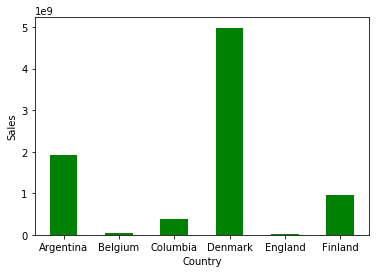

In [11]:
pivot_tab=train_df.pivot_table(index="Country",values="Sales",aggfunc=np.sum)
plt.bar(pivot_tab.index,pivot_tab["Sales"],0.5,color="green")
plt.xlabel("Country")
plt.ylabel("Sales")

The conclusion that can be drawn from the above graph is that the a merchant is most likely to most successful in selling products in Denmark as Denmark has the highest Sales amongst all the Cuntries available.

# Weekly Sales

Text(0,0.5,'Sales')

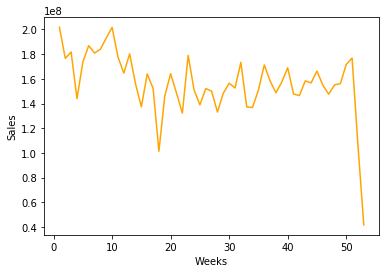

In [12]:
pivot_tab=train_df.pivot_table(index="Week",values="Sales",aggfunc=np.sum)
plt.plot(pivot_tab.index,pivot_tab["Sales"],color="orange")
plt.xlabel("Weeks")
plt.ylabel("Sales")

# Expenses by each Countries

Text(0,0.5,'Sales')

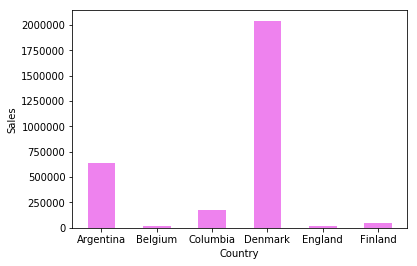

In [13]:
pivot_tab=t.pivot_table(index="Country",values="Expense_Price",aggfunc=np.sum)
plt.bar(pivot_tab.index,pivot_tab["Expense_Price"],0.5,color="violet")
plt.xlabel("Country")
plt.ylabel("Sales")

# Sales VS Expenses for each country

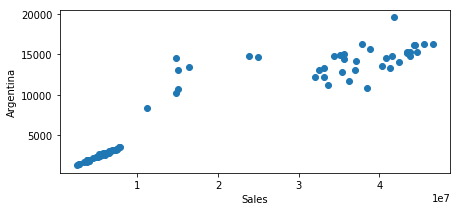

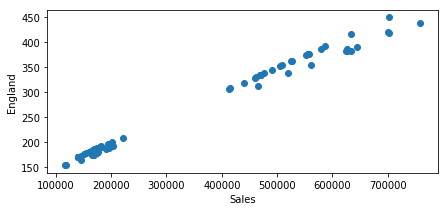

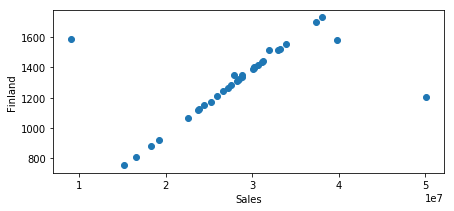

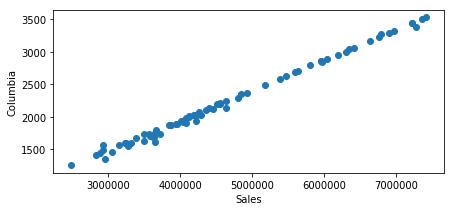

In [14]:
for i in ["Argentina","England","Finland","Columbia"]:
    plt.figure(figsize=(7,3))
    df=t[t["Country"]==i]
    plt.scatter(df["Sales"],df["Expense_Price"])
    plt.xlabel("Sales")
    plt.ylabel(i)
    plt.show()